<a href="https://colab.research.google.com/github/SanaSNavas7/Machine-Learning/blob/main/aerosolopticaldepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("/content/drive/MyDrive/AEROSOL/Data_final.xlsx",sheet_name="Sheet1" )

In [ ]:
df.info

<bound method DataFrame.info of           Date  Black Carbon      Dust  Organic Carbon  Sea Salt   Sulfate  \
0   2015-01-01      0.005958  0.019366        0.059087  0.024181  0.158504   
1   2015-01-02      0.005628  0.020028        0.053890  0.018044  0.160012   
2   2015-01-03      0.004598  0.017004        0.043461  0.010853  0.126752   
3   2015-01-04      0.004868  0.014273        0.046138  0.012320  0.133098   
4   2015-01-05      0.005733  0.011245        0.053947  0.018818  0.169862   
..         ...           ...       ...             ...       ...       ...   
360 2015-12-27      0.006423  0.011213        0.057488  0.027432  0.183455   
361 2015-12-28      0.005655  0.009095        0.051992  0.031687  0.158422   
362 2015-12-29      0.004828  0.008534        0.044643  0.030084  0.122658   
363 2015-12-30      0.003883  0.007434        0.037422  0.022482  0.084287   
364 2015-12-31      0.003920  0.009965        0.037195  0.023549  0.072357   

          AOD    ARF_SUR   ARF_TOA   ARF_ATM  ...          30          20  \
0    0.344608 -13.037181 -7.806388  5.230792  ...  212.396011  216.616531   
1    0.373974 -13.547692 -7.789671  5.758022  ...  212.616913  216.386108   
2    0.301531 -12.147840 -6.527802  5.620038  ...  211.346405  217.119888   
3    0.290705 -12.318655 -6.350877  5.967778  ...  213.107071  217.420197   
4    0.389040 -14.356131 -7.684608  6.671523  ...  212.864822  217.734009   
..        ...        ...       ...       ...  ...         ...         ...   
360  0.349617 -16.550813 -8.853442  7.697370  ...  214.603745  219.861053   
361  0.342717 -14.932888 -8.056430  6.876458  ...  214.411240  219.009354   
362  0.237448 -12.854040 -6.853519  6.000521  ...  214.586121  219.866730   
363  0.141873 -10.426218 -5.332359  5.093859  ...  214.723984  219.919998   
364  0.211219  -9.457002 -4.664924  4.792078  ...  214.213303  219.419586   

             15          10           7           5           3           2  \
0    219.711304  223.965424  229.254471  235.236984  245.154968  253.049850   
1    219.240173  223.354080  228.856689  234.884354  243.855621  250.502563   
2    220.852097  225.114441  229.480392  234.466049  243.765656  252.000412   
3    220.026367  223.119965  227.903885  233.983765  243.941422  251.725067   
4    220.608780  223.706390  227.432220  232.238388  242.293823  251.723312   
..          ...         ...         ...         ...         ...         ...   
360  223.322815  227.610504  232.329285  238.035156  248.798538  256.825989   
361  222.055603  226.289047  231.728333  238.192490  248.967102  256.758240   
362  223.243073  227.258072  231.762146  237.178482  248.090103  256.894958   
363  222.807053  226.033066  230.179153  236.168411  248.606171  257.677490   
364  222.613312  226.353485  230.663193  236.702667  248.844208  257.075500   

            1.5           1  
0    258.576385  263.529602  
1    256.167938  262.425415  
2    257.922791  263.147552  
3    257.598938  263.089050  
4    258.130096  263.478363  
..          ...         ...  
360  261.276367  264.744781  
361  261.335815  264.879761  
362  261.772125  265.269989  
363  262.195923  265.298340  
364  261.429871  264.755402  

[365 rows x 34 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of           Date  Black Carbon      Dust  Organic Carbon  Sea Salt   Sulfate  \
0   2015-01-01      0.005958  0.019366        0.059087  0.024181  0.158504   
1   2015-01-02      0.005628  0.020028        0.053890  0.018044  0.160012   
2   2015-01-03      0.004598  0.017004        0.043461  0.010853  0.126752   
3   2015-01-04      0.004868  0.014273        0.046138  0.012320  0.133098   
4   2015-01-05      0.005733  0.011245        0.053947  0.018818  0.169862   
..         ...           ...       ...             ...       ...       ...   
360 2015-12-27      0.006423  0.011213        0.057488  0.027432  0.183455   
361 2015-12-28      0.005655  0.009095        0.051992  0.031687  0.158422   
362 2015-12-29      0.004828  0.008534        0.044643  0.030084  0.122658   
363 2015-12-30      0.003883  0.007434        0.037422  0.022482  0.084287   
364 2015-12-31      0.003920  0.009965        0.037195  0.023549  0.072357   

          AOD    ARF_SUR   ARF_TOA   ARF_ATM  ...          30          20  \
0    0.344608 -13.037181 -7.806388  5.230792  ...  212.396011  216.616531   
1    0.373974 -13.547692 -7.789671  5.758022  ...  212.616913  216.386108   
2    0.301531 -12.147840 -6.527802  5.620038  ...  211.346405  217.119888   
3    0.290705 -12.318655 -6.350877  5.967778  ...  213.107071  217.420197   
4    0.389040 -14.356131 -7.684608  6.671523  ...  212.864822  217.734009   
..        ...        ...       ...       ...  ...         ...         ...   
360  0.349617 -16.550813 -8.853442  7.697370  ...  214.603745  219.861053   
361  0.342717 -14.932888 -8.056430  6.876458  ...  214.411240  219.009354   
362  0.237448 -12.854040 -6.853519  6.000521  ...  214.586121  219.866730   
363  0.141873 -10.426218 -5.332359  5.093859  ...  214.723984  219.919998   
364  0.211219  -9.457002 -4.664924  4.792078  ...  214.213303  219.419586   

             15          10           7           5           3           2  \
0    219.711304  223.965424  229.254471  235.236984  245.154968  253.049850   
1    219.240173  223.354080  228.856689  234.884354  243.855621  250.502563   
2    220.852097  225.114441  229.480392  234.466049  243.765656  252.000412   
3    220.026367  223.119965  227.903885  233.983765  243.941422  251.725067   
4    220.608780  223.706390  227.432220  232.238388  242.293823  251.723312   
..          ...         ...         ...         ...         ...         ...   
360  223.322815  227.610504  232.329285  238.035156  248.798538  256.825989   
361  222.055603  226.289047  231.728333  238.192490  248.967102  256.758240   
362  223.243073  227.258072  231.762146  237.178482  248.090103  256.894958   
363  222.807053  226.033066  230.179153  236.168411  248.606171  257.677490   
364  222.613312  226.353485  230.663193  236.702667  248.844208  257.075500   

            1.5           1  
0    258.576385  263.529602  
1    256.167938  262.425415  
2    257.922791  263.147552  
3    257.598938  263.089050  
4    258.130096  263.478363  
..          ...         ...  
360  261.276367  264.744781  
361  261.335815  264.879761  
362  261.772125  265.269989  
363  262.195923  265.298340  
364  261.429871  264.755402  

[365 rows x 34 columns]>

In [ ]:
df=df.drop("Date",axis=1)

In [ ]:
df

,Black Carbon,Dust,Organic Carbon,Sea Salt,Sulfate,AOD,ARF_SUR,ARF_TOA,ARF_ATM,1000,...,30,20,15,10,7,5,3,2,1.5,1
0,0.005958,0.019366,0.059087,0.024181,0.158504,0.344608,-13.037181,-7.806388,5.230792,297.142181,...,212.396011,216.616531,219.711304,223.965424,229.254471,235.236984,245.154968,253.049850,258.576385,263.529602
1,0.005628,0.020028,0.053890,0.018044,0.160012,0.373974,-13.547692,-7.789671,5.758022,297.413849,...,212.616913,216.386108,219.240173,223.354080,228.856689,234.884354,243.855621,250.502563,256.167938,262.425415
2,0.004598,0.017004,0.043461,0.010853,0.126752,0.301531,-12.147840,-6.527802,5.620038,297.789246,...,211.346405,217.119888,220.852097,225.114441,229.480392,234.466049,243.765656,252.000412,257.922791,263.147552
3,0.004868,0.014273,0.046138,0.012320,0.133098,0.290705,-12.318655,-6.350877,5.967778,298.414734,...,213.107071,217.420197,220.026367,223.119965,227.903885,233.983765,243.941422,251.725067,257.598938,263.089050
4,0.005733,0.011245,0.053947,0.018818,0.169862,0.389040,-14.356131,-7.684608,6.671523,298.637970,...,212.864822,217.734009,220.608780,223.706390,227.432220,232.238388,242.293823,251.723312,258.130096,263.478363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.006423,0.011213,0.057488,0.027432,0.183455,0.349617,-16.550813,-8.853442,7.697370,298.792999,...,214.603745,219.861053,223.322815,227.610504,232.329285,238.035156,248.798538,256.825989,261.276367,264.744781
361,0.005655,0.009095,0.051992,0.031687,0.158422,0.342717,-14.932888,-8.056430,6.876458,298.091278,...,214.411240,219.009354,222.055603,226.289047,231.728333,238.192490,248.967102,256.758240,261.335815,264.879761
362,0.004828,0.008534,0.044643,0.030084,0.122658,0.237448,-12.854040,-6.853519,6.000521,298.981293,...,214.586121,219.866730,223.243073,227.258072,231.762146,237.178482,248.090103,256.894958,261.772125,265.269989
363,0.003883,0.007434,0.037422,0.022482,0.084287,0.141873,-10.426218,-5.332359,5.093859,298.723358,...,214.723984,219.919998,222.807053,226.033066,230.179153,236.168411,248.606171,257.677490,262.195923,265.298340


DATA PREPROCESSING

In [ ]:

df_modified = df.drop(df[df['AOD'] < -1000].index, inplace = False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


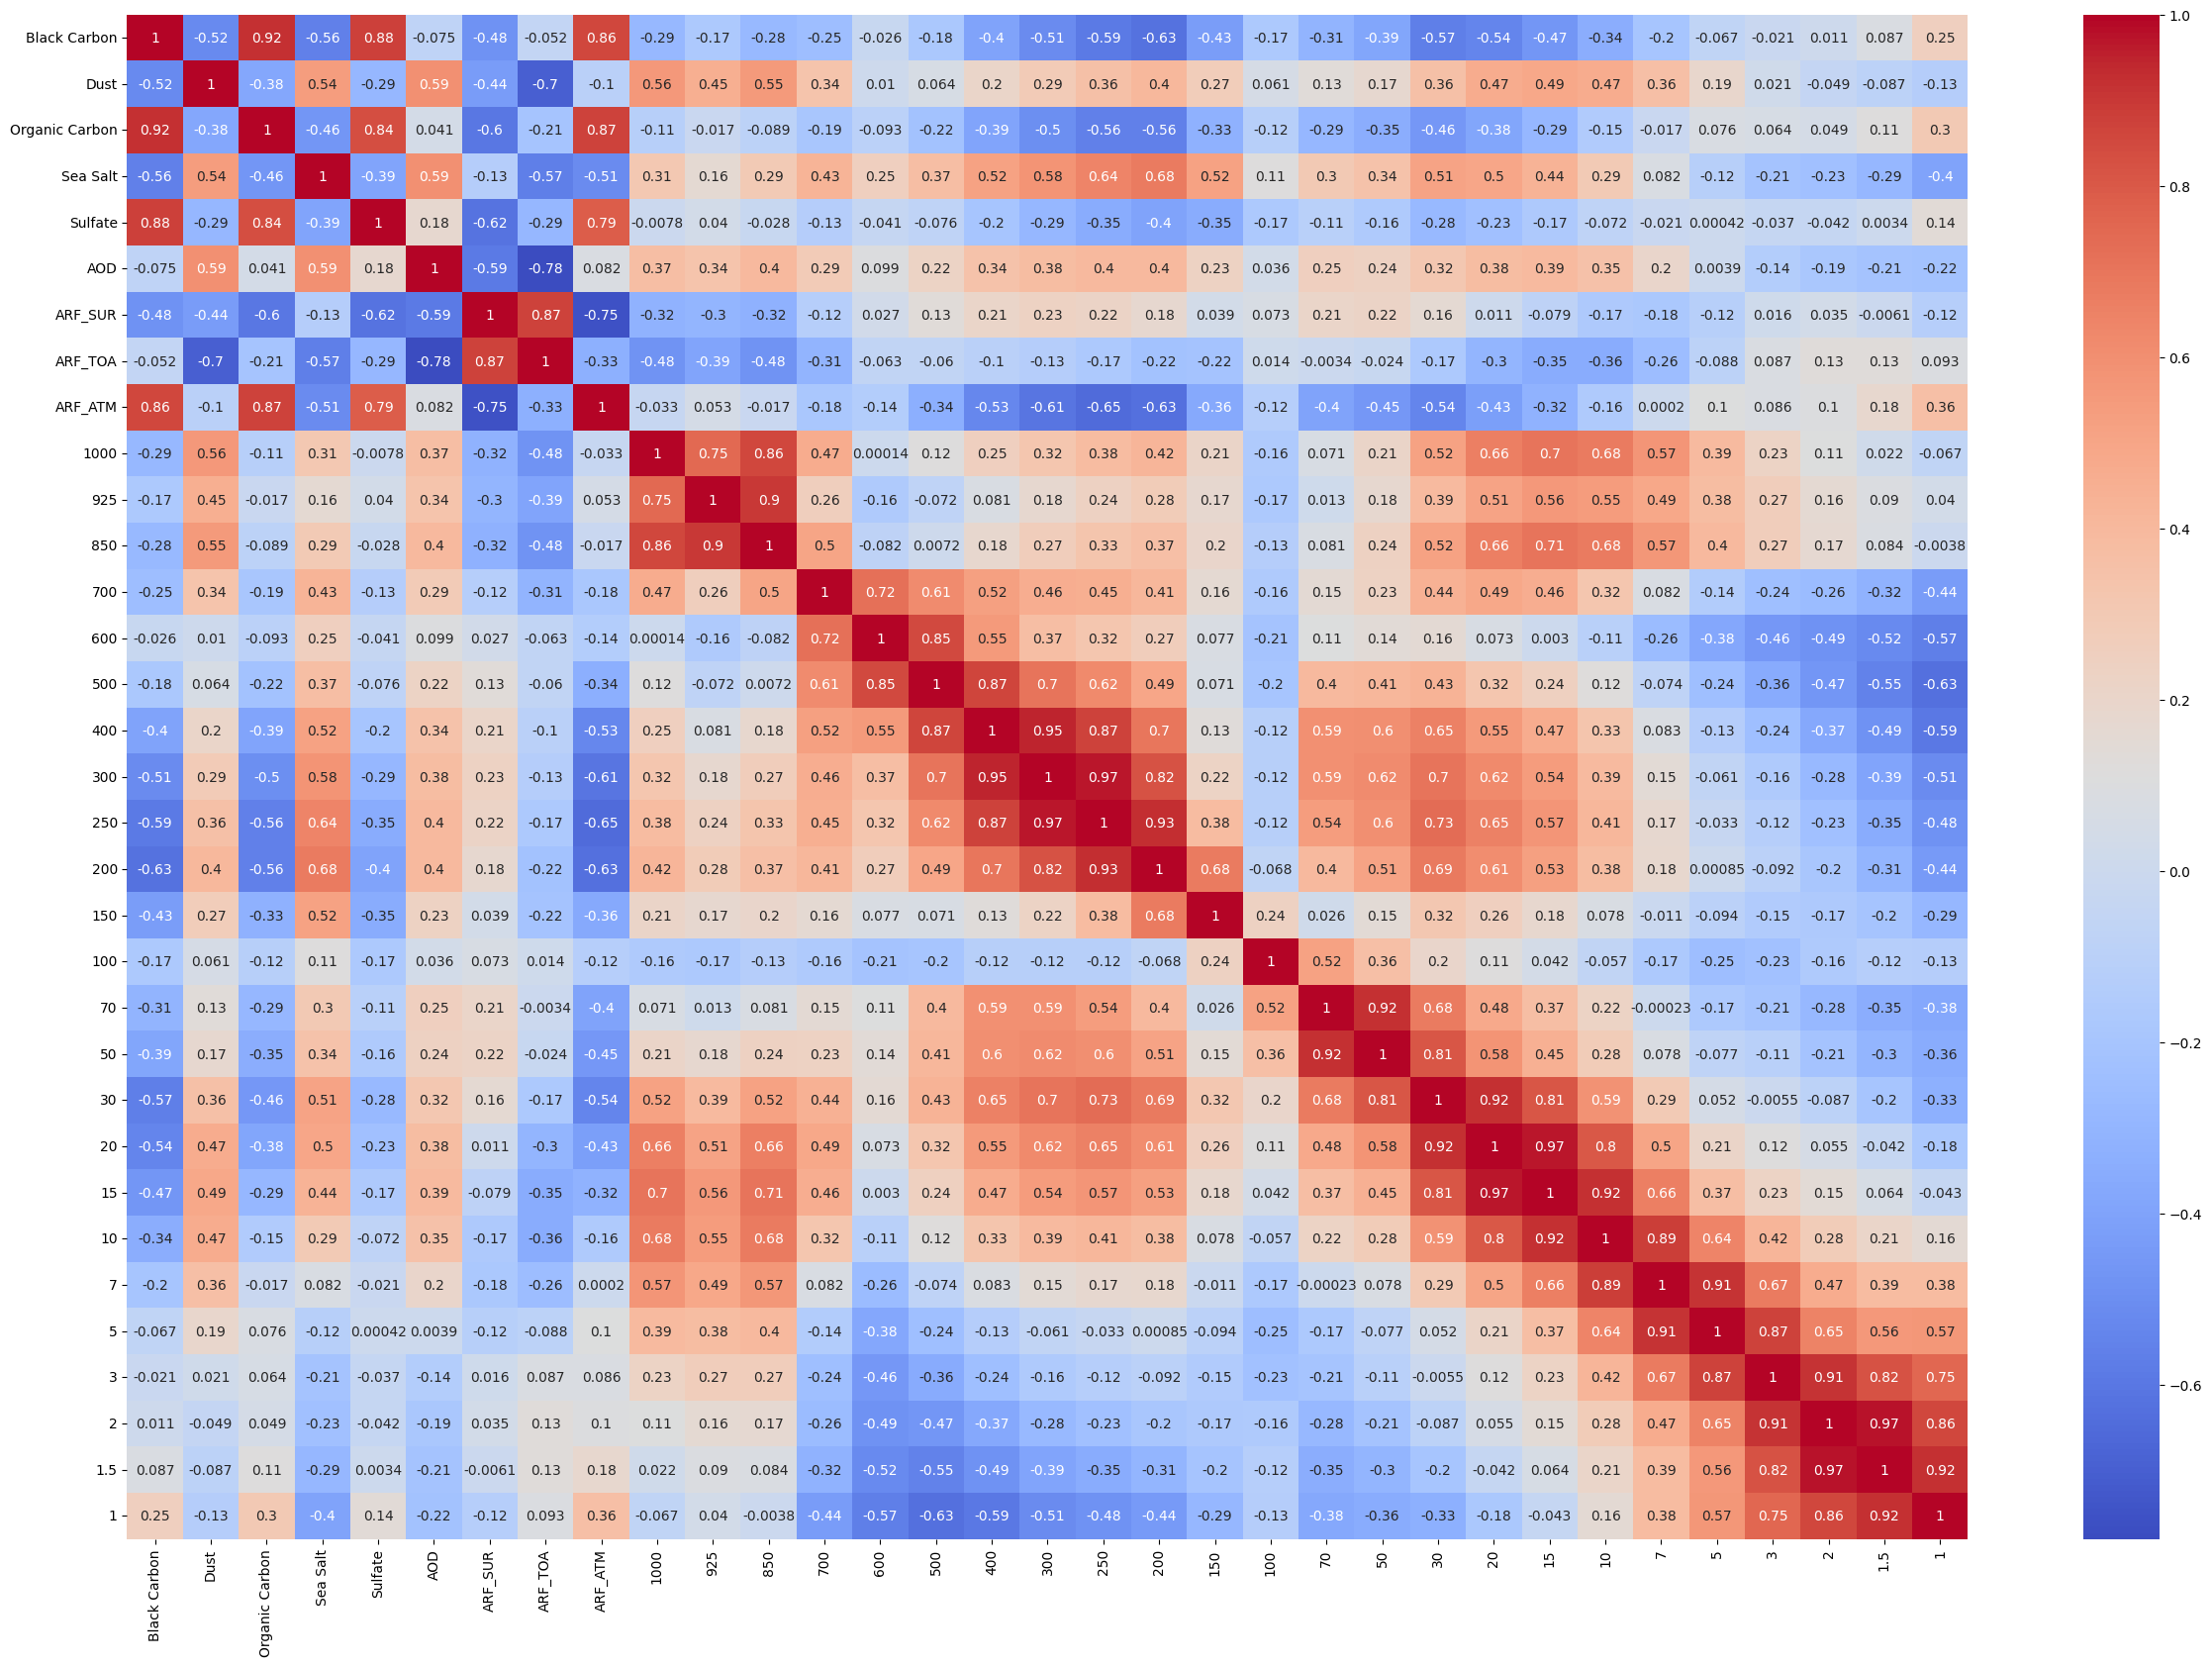

In [ ]:
# Assuming df_modified is your DataFrame
corr_matrix = df_modified.corr()


# Set the size of the heatmap
plt.figure(figsize=(30, 20))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

In [ ]:
selected_columns = ['Black Carbon', 'Dust', 'Organic Carbon', 'Sea Salt', 'Sulfate','AOD']
df_selected = df_modified[selected_columns]


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)

                Black Carbon      Dust  Organic Carbon  Sea Salt   Sulfate  \
Black Carbon        1.000000 -0.518933        0.920770 -0.559530  0.881778   
Dust               -0.518933  1.000000       -0.378704  0.539114 -0.289308   
Organic Carbon      0.920770 -0.378704        1.000000 -0.462436  0.837001   
Sea Salt           -0.559530  0.539114       -0.462436  1.000000 -0.392475   
Sulfate             0.881778 -0.289308        0.837001 -0.392475  1.000000   
AOD                -0.075208  0.592170        0.041141  0.591739  0.176701   

                     AOD  
Black Carbon   -0.075208  
Dust            0.592170  
Organic Carbon  0.041141  
Sea Salt        0.591739  
Sulfate         0.176701  
AOD             1.000000  


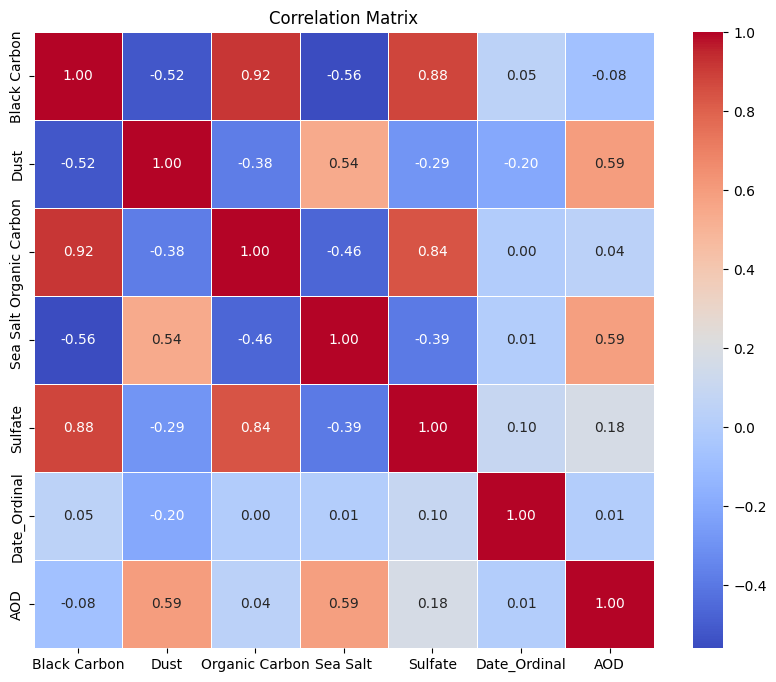

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
selected_columns = ['AOD', 'ARF_SUR', 'ARF_TOA', 'ARF_ATM',
                  'Date_Ordinal']
df_selected = df_modified[selected_columns]

                   AOD   ARF_SUR   ARF_TOA   ARF_ATM  Date_Ordinal
AOD           1.000000 -0.587435 -0.780273  0.082428      0.007011
ARF_SUR      -0.587435  1.000000  0.871072 -0.752926      0.219014
ARF_TOA      -0.780273  0.871072  1.000000 -0.332621      0.180214
ARF_ATM       0.082428 -0.752926 -0.332621  1.000000     -0.179056
Date_Ordinal  0.007011  0.219014  0.180214 -0.179056      1.000000


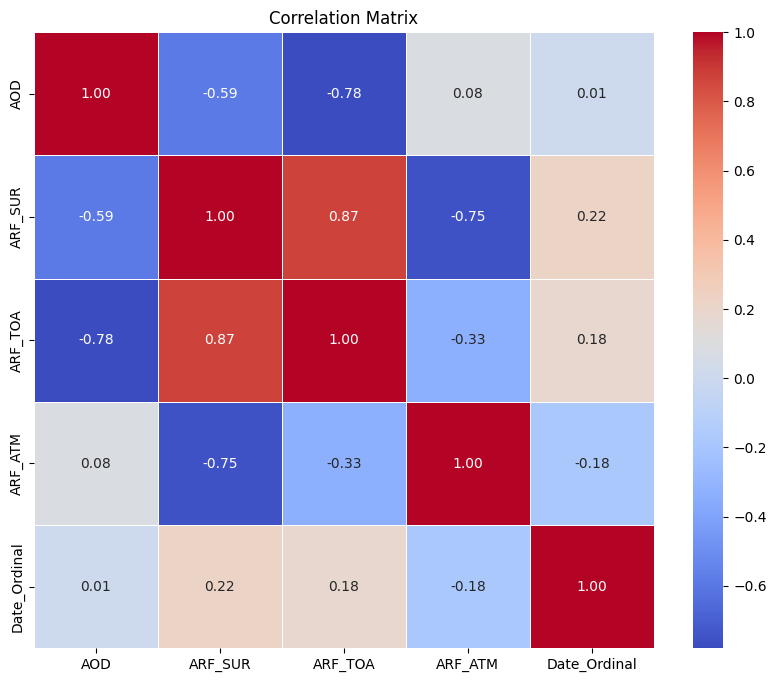

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
selected_columns = [1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100, 70, 50, 30, 20, 15, 10, 7, 5, 3, 2, 1.5, 1, 'AOD']
df_selected = df_modified[selected_columns]

          1000       925       850       700       600       500       400  \
1000  1.000000  0.746996  0.855652  0.469821  0.000140  0.116377  0.249788   
925   0.746996  1.000000  0.901633  0.262194 -0.158157 -0.072234  0.081004   
850   0.855652  0.901633  1.000000  0.504593 -0.082080  0.007221  0.180997   
700   0.469821  0.262194  0.504593  1.000000  0.715338  0.612121  0.524390   
600   0.000140 -0.158157 -0.082080  0.715338  1.000000  0.853795  0.550345   
500   0.116377 -0.072234  0.007221  0.612121  0.853795  1.000000  0.866717   
400   0.249788  0.081004  0.180997  0.524390  0.550345  0.866717  1.000000   
300   0.320530  0.175564  0.268399  0.459745  0.373735  0.702801  0.945982   
250   0.382419  0.239791  0.329137  0.451654  0.324092  0.622478  0.868998   
200   0.417743  0.283057  0.365556  0.412224  0.267112  0.494078  0.700249   
150   0.213328  0.174138  0.199148  0.159340  0.076884  0.070506  0.130095   
100  -0.155626 -0.174757 -0.130027 -0.156154 -0.210152 -0.198525

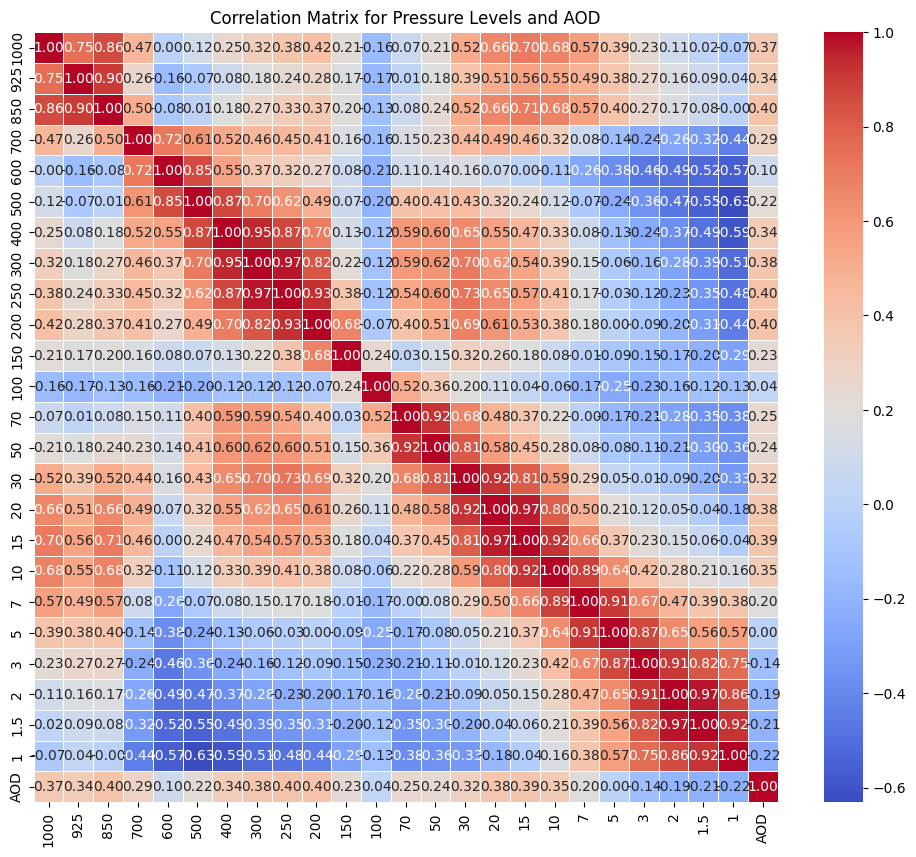

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

In [ ]:
# Calculate the correlation matrix for selected columns
correlation_matrix_selected = df_selected.corr()

# Display the correlation matrix for selected columns
print(correlation_matrix_selected)

# Plotting the heatmap for selected columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Pressure Levels and AOD')
plt.show()
plt.figure(figsize=(30, 18))

In [ ]:
columns_to_drop = ['Black Carbon', 'Sulfate','ARF_SUR','AOD']
df_modified1 = df_modified.drop(columns_to_drop, axis=1)

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Select the features to be scaled (excluding 'Black Carbon' and 'Sulfate')
features_to_scale = ['Dust', 'Organic Carbon', 'Sea Salt', 'ARF_TOA', 'ARF_ATM', '1000', '925', '850', '700', '600', '500', '400', '300', '250', '200', '150', '100', '70', '50', '30', '20', '15', '10', '7', '5', '3', '2', '1.5', '1','Date_Ordinal']

In [ ]:
len(features_to_scale)

30

In [ ]:

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

In [ ]:

df_modified1.columns = df_modified1.columns.astype(str)

In [ ]:

# Apply Min-Max scaling to the selected features
df_modified1[features_to_scale] = scaler.fit_transform(df_modified1[features_to_scale])

# Display the modified DataFrame with scaled features
print(df_modified1.head())

       Dust  Organic Carbon  Sea Salt   ARF_TOA   ARF_ATM      1000       925  \
0  0.039212        0.275245  0.037141  0.765133  0.354910  0.018037  0.000000   
1  0.041145        0.245395  0.020040  0.766068  0.394492  0.077794  0.148322   
2  0.032310        0.185491  0.000000  0.836581  0.384133  0.160367  0.144550   
3  0.024330        0.200866  0.004088  0.846468  0.410240  0.297951  0.305793   
4  0.015480        0.245723  0.022197  0.771939  0.463075  0.347054  0.242007   

        850       700       600  ...        20        15        10         7  \
0  0.000000  0.117371  0.518849  ...  0.071510  0.052511  0.228759  0.317538   
1  0.098496  0.000000  0.436962  ...  0.047898  0.008491  0.182340  0.290163   
2  0.153932  0.358791  0.736473  ...  0.123092  0.159099  0.316002  0.333085   
3  0.277197  0.551523  0.836974  ...  0.153866  0.081948  0.164564  0.224592   
4  0.290612  0.722556  0.920015  ...  0.186024  0.136365  0.209091  0.192133   

          5         3         2 

In [ ]:
# Assuming your DataFrame is named df

# Select the value under the column '1000' for the first row
first_value_1000 = df_modified1.loc[0, '30']

print(first_value_1000)



0.22937737675691494


In [ ]:

  X = df_modified1[features_to_scale]
  y = df_modified['AOD']

In [ ]:
y

0      0.344608
1      0.373974
2      0.301531
3      0.290705
4      0.389040
         ...   
360    0.349617
361    0.342717
362    0.237448
363    0.141873
364    0.211219
Name: AOD, Length: 363, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred_linear = model_linear.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.008588577290495957
R-squared: 0.719541249291699


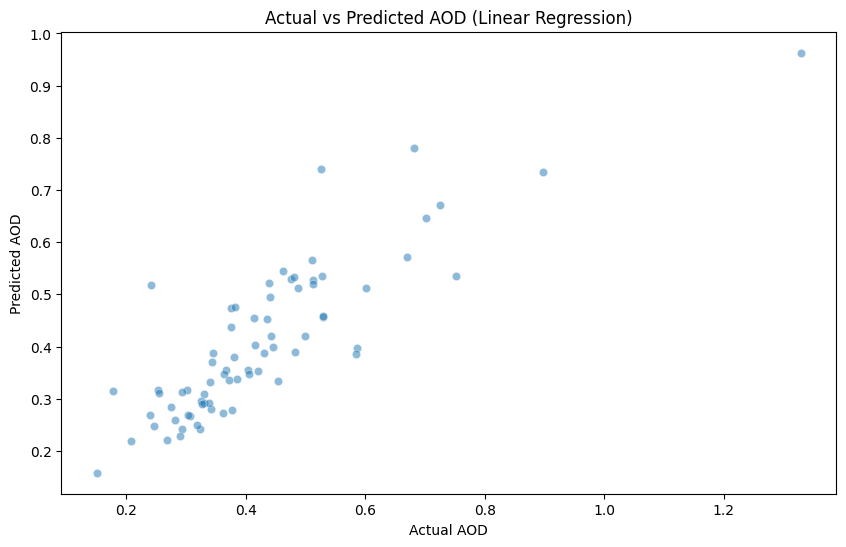

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5)
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.title('Actual vs Predicted AOD (Linear Regression)')
plt.show()

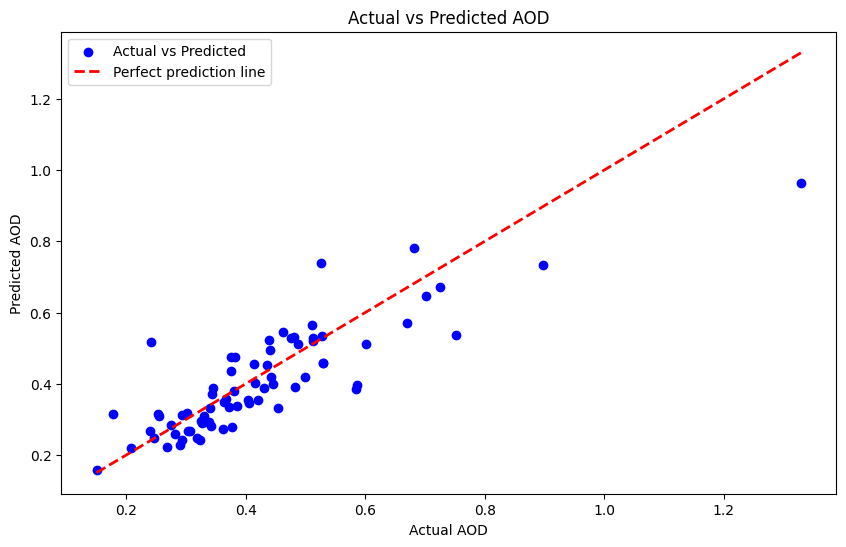

In [ ]:

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

rf_regressor = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)

In [ ]:
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [ ]:
r2

0.7152917025596741

In [ ]:
mse

0.008718712508118499

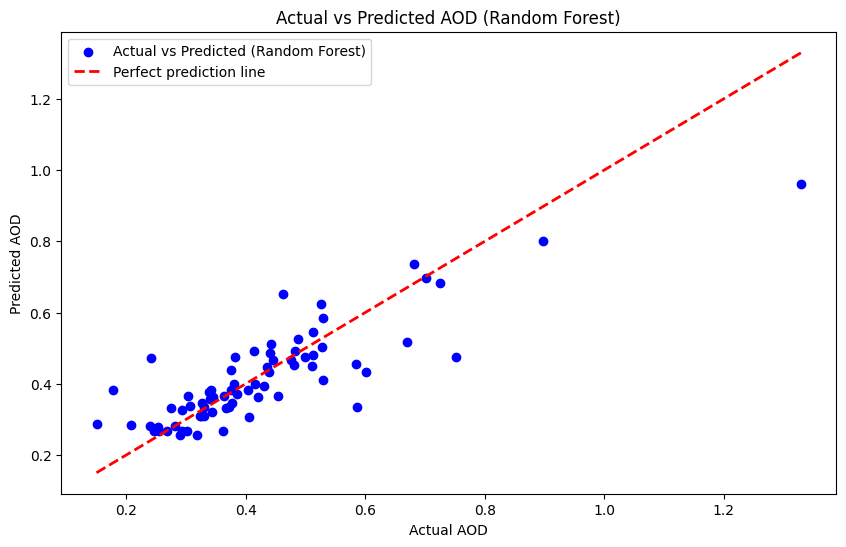

In [ ]:
# Visualize the results for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD (Random Forest)')
plt.show()

In [ ]:
import xgboost as xgb


In [ ]:
# Create an XGBoost Regressor instance
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

In [ ]:
# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Make predictions on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

In [ ]:
# Evaluate the performance
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.010047870163174152
R-squared: 0.6718882513450251


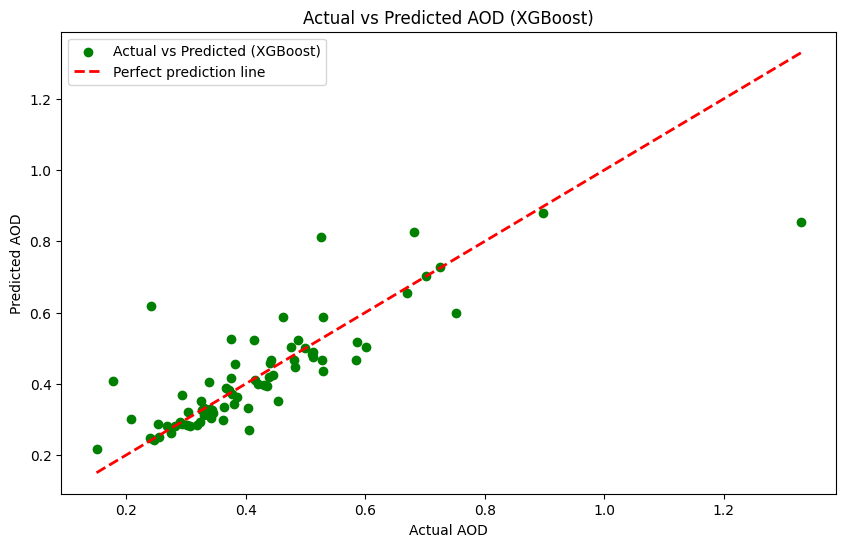

In [ ]:
# Visualize the results for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Actual vs Predicted (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD (XGBoost)')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=5)

In [ ]:
# Fit the model to the data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Make predictions on the scaled test data
y_pred = tree_regressor.predict(X_test)

In [ ]:


# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.013204810658370335
R-squared: 0.5687988155285792


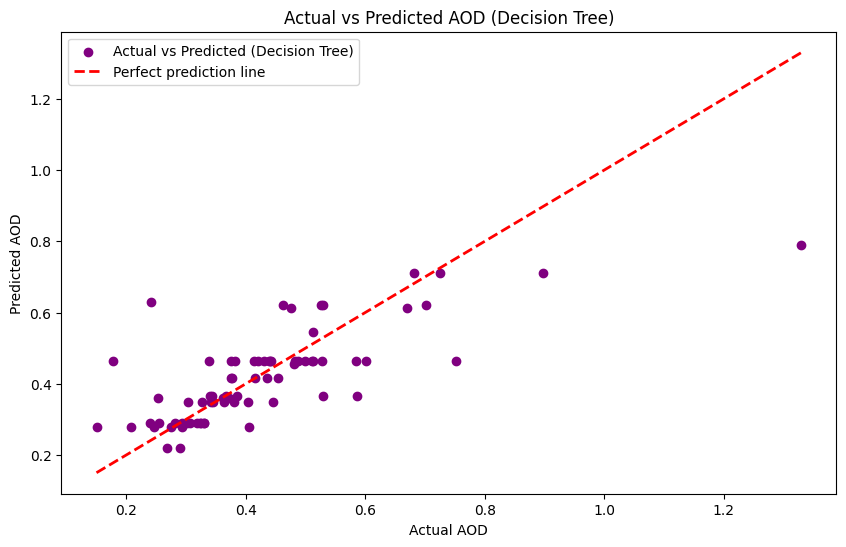

In [ ]:
# Visualize the results for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', label='Actual vs Predicted (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD (Decision Tree)')
plt.show()

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
X = df_modified1[features_to_scale]
y = df_modified['AOD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9/9 [==============================] - 3s 27ms/step - loss: 0.2287 - val_loss: 0.0840
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0844 - val_loss: 0.0460
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0317 - val_loss: 0.0205
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.0186
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0222
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0125
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0191 - val_loss: 0.0129
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.0145
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0103
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.0106
Epoch 11/50
9/9 [=====================

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 4ms/step


In [ ]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.009435801048579507
R-squared: 0.6918752798621122


In [ ]:
from scipy.stats import kendalltau

In [ ]:
# Initialize a dictionary to store correlation values for each feature
correlation_values = {}

In [ ]:
# Calculate Kendall Tau correlation coefficient for each feature
for feature in X.columns:
    correlation, _ = kendalltau(X[feature], y)
    correlation_values[feature] = correlation


In [ ]:
# Sort features based on correlation values
sorted_features = sorted(correlation_values, key=lambda k: abs(correlation_values[k]), reverse=True)

In [ ]:

# Display the correlation values
for feature in sorted_features:
    print(f"{feature}: {correlation_values[feature]}")

ARF_TOA: -0.5848179293194722
Dust: 0.4037350746468971
Sea Salt: 0.3561258115278632
850: 0.34561850767714386
1000: 0.32167480936943516
15: 0.3023149627870873
925: 0.2893214818757689
20: 0.2823332445574695
10: 0.27449279332754967
250: 0.2674347813161731
300: 0.26347350958099325
200: 0.25248466584478635
400: 0.2519976256791927
30: 0.2312375386207631
70: 0.1932179656941083
50: 0.19044792475229438
700: 0.18923032433831025
7: 0.15571587294339678
1.5: -0.1534937521878757
2: -0.14865379054228875
150: 0.14136448385174002
500: 0.13553620895911
1: -0.12722402325616788
3: -0.11169961797787009
Organic Carbon: -0.06243388660942366
600: 0.04436631508454712
100: 0.03432111166917796
ARF_ATM: 0.029496594498780376
5: 0.021079707167100434
Date_Ordinal: 0.007442582530478059


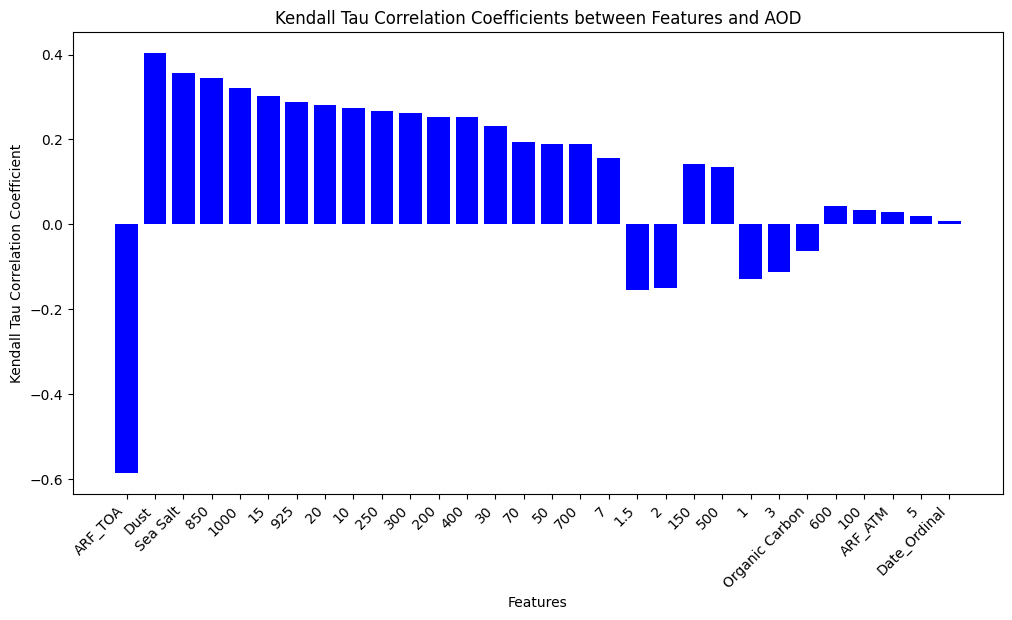

In [ ]:
# Bar plot for Kendall Tau correlation coefficients
plt.figure(figsize=(12, 6))
plt.bar(sorted_features, [correlation_values[feature] for feature in sorted_features], color='blue')
plt.xlabel('Features')
plt.ylabel('Kendall Tau Correlation Coefficient')
plt.title('Kendall Tau Correlation Coefficients between Features and AOD')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
correlation_coefficients = {}

In [ ]:

# Iterate through columns of df_modified1
for column in df_modified1.columns:
    # Calculate Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(df_modified1[column], y)
    correlation_coefficients[column] = correlation_coefficient


In [ ]:
# Print the correlation coefficients
for feature, coefficient in correlation_coefficients.items():
    print(f'{feature}: {coefficient}')

Dust: 0.5921700406954932
Organic Carbon: 0.04114110999892206
Sea Salt: 0.591739083111132
ARF_TOA: -0.7802729107738104
ARF_ATM: 0.08242809035762651
1000: 0.36734775784425744
925: 0.33909121794899316
850: 0.39584489361705066
700: 0.28916491876149986
600: 0.0992825704356914
500: 0.22212291678240395
400: 0.34041750072170956
300: 0.37642048353963004
250: 0.39937763985505315
200: 0.399278674249158
150: 0.23447870034672758
100: 0.036293230555750886
70: 0.2540580291152241
50: 0.2369758780246175
30: 0.3165237622747321
20: 0.3780913292191039
15: 0.38814729109477963
10: 0.34885779703196645
7: 0.19596310905384073
5: 0.0038885876927377363
3: -0.14039132563796286
2: -0.18716429469318624
1.5: -0.21345961766730165
1: -0.21801786033862014
Date_Ordinal: 0.007010913796890207


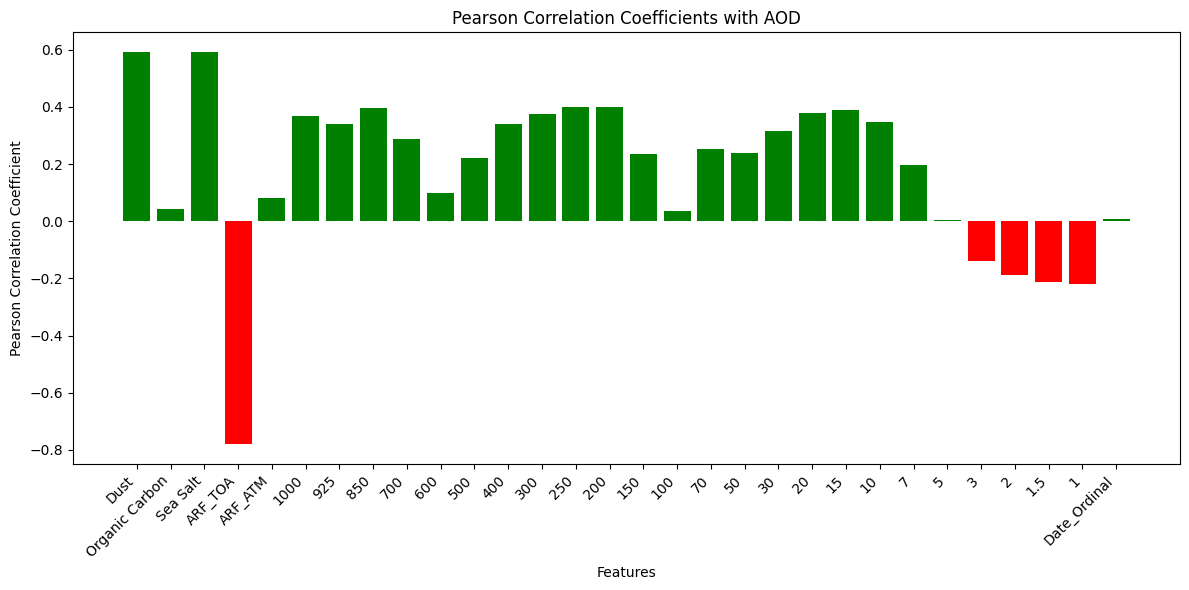

In [ ]:
# Assuming correlation_coefficients is the dictionary containing correlation coefficients
features = list(correlation_coefficients.keys())
coefficients = list(correlation_coefficients.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(features, coefficients, color=np.where(np.array(coefficients) > 0, 'g', 'r'))  # Green for positive, red for negative
plt.xlabel('Features')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Pearson Correlation Coefficients with AOD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Compute Spearman correlation matrix
spearman_corr_matrix = df.corr(method='spearman')

In [ ]:
# Extract the correlation of each feature with 'AOD'
spearman_corr_with_aod = spearman_corr_matrix['AOD'].drop('AOD')

In [ ]:
print(spearman_corr_with_aod)


Black Carbon     -0.116068
Dust              0.561786
Organic Carbon   -0.100059
Sea Salt          0.480165
Sulfate           0.159257
ARF_SUR          -0.576882
ARF_TOA          -0.748381
ARF_ATM           0.040853
1000              0.467108
925               0.426511
850               0.507034
700               0.272067
600               0.057900
500               0.186781
400               0.352412
300               0.367041
250               0.369888
200               0.351974
150               0.198966
100               0.054667
70                0.284440
50                0.280660
30                0.342803
20                0.417860
15                0.447137
10                0.407281
7                 0.243229
5                 0.044651
3                -0.147368
2                -0.204031
1.5              -0.212099
1                -0.173989
Date_Ordinal      0.010894
Name: AOD, dtype: float64


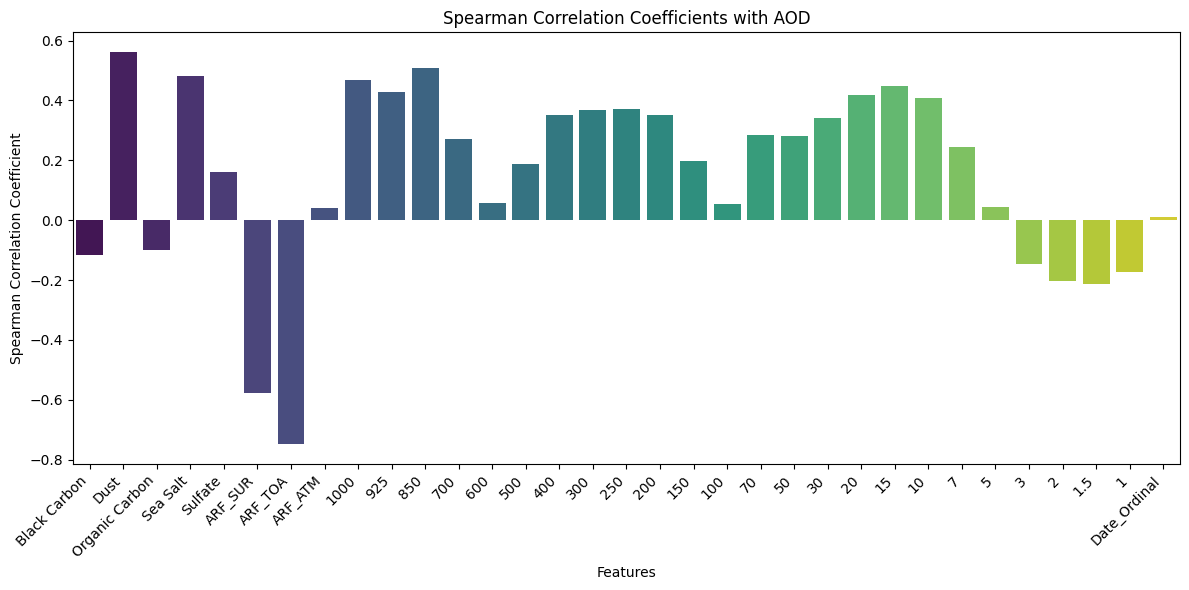

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=spearman_corr_with_aod.index, y=spearman_corr_with_aod.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Spearman Correlation Coefficient')
plt.title('Spearman Correlation Coefficients with AOD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox import pdp, info_plots
from sklearn.inspection import permutation_importance


In [ ]:
# Assuming rf_model is your trained regression model (Random Forest for example)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Calculate permutation feature importances
pfi_result = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
# Get feature importances
feature_importances = pfi_result.importances_mean

In [ ]:
# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

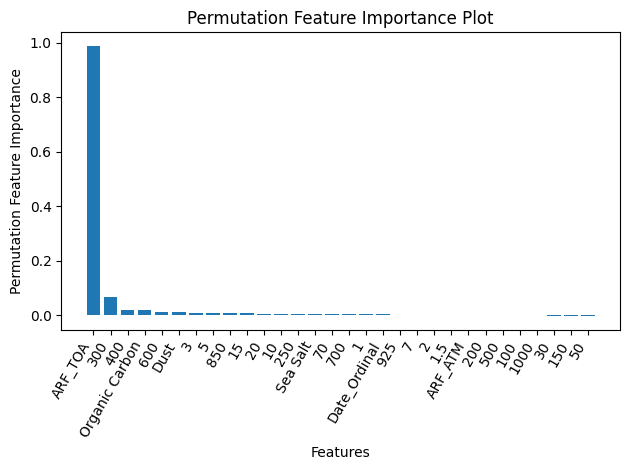

In [ ]:


plt.bar(range(len(X.columns)), feature_importances[sorted_indices], tick_label=[X.columns[i] for i in sorted_indices])
plt.xlabel('Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance Plot')
plt.xticks(rotation=60, ha='right')  # Adjust the rotation angle and alignment as needed
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

# Specify the feature index for ARF_ATM
feature_index = 5 # Adjust this based on your feature order

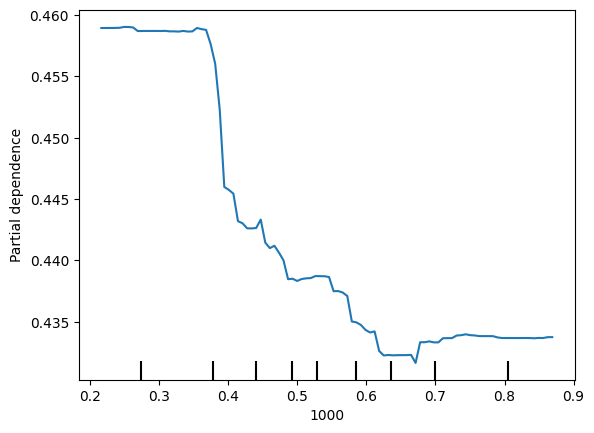

In [ ]:

# Create a display object for visualization
pd_display = PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[feature_index])

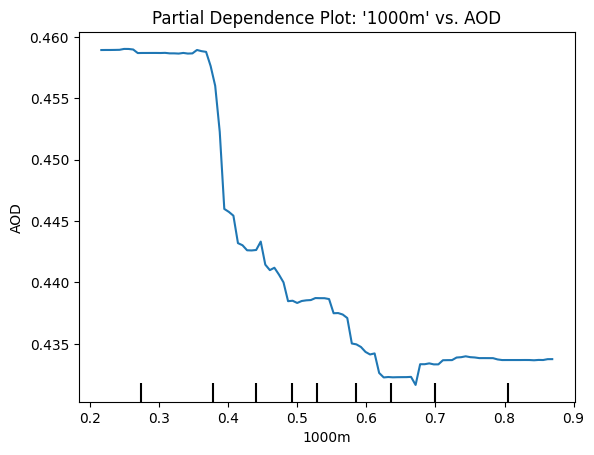

In [ ]:
# Plot the partial dependence
pd_display.plot()
plt.xlabel("1000m")
plt.ylabel("AOD")
plt.title("Partial Dependence Plot: '1000m' vs. AOD")
plt.show()

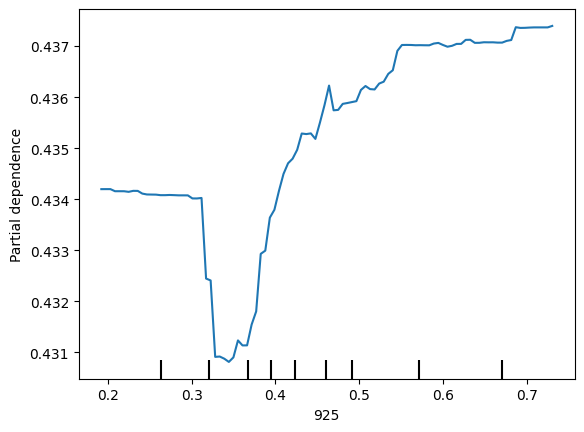

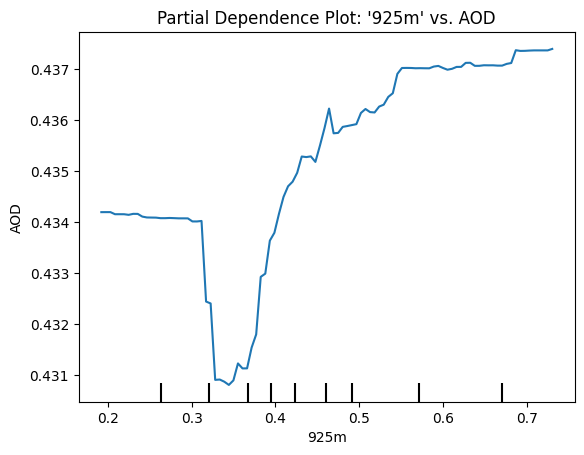

In [ ]:

# Specify the feature index for ARF_ATM
feature_index = 6  # Adjust this based on your feature order

# Create a display object for visualization
pd_display = PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[feature_index])

# Plot the partial dependence
pd_display.plot()
plt.xlabel("925m")
plt.ylabel("AOD")
plt.title("Partial Dependence Plot: '925m' vs. AOD")
plt.show()

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl s

In [ ]:
import gradio as gr
import pickle

In [ ]:
with open("randomforest.pkl", "wb") as f:
     pickle.dump(rf_regressor, f)

In [ ]:
with open("randomforest.pkl", "rb") as f:
	rf_regressor = pickle.load(f)

In [ ]:
# Define prediction function using the loaded model
def predict_aod(dust, organic_carbon, sea_salt, arf_toa, arf_atm, *args):
    # Extract inputs and convert to numpy array
    X = np.array([dust, organic_carbon, sea_salt, arf_toa, arf_atm] + list(args)).reshape(1, -1)
    # Make prediction
    prediction = rf_regressor.predict(X)[0]
    return prediction

In [ ]:
# Define input labels
input_labels = ['Dust', 'Organic Carbon', 'Sea Salt', 'ARF_TOA', 'ARF_ATM', '1000', '925', '850', '700', '600', '500', '400', '300', '250', '200', '150', '100', '70', '50', '30', '20', '15', '10', '7', '5', '3', '2', '1.5', '1', 'Date_Ordinal']
inputs = [gr.Textbox(label=label) for label in input_labels]


In [ ]:
import numpy as np
import pickle
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target vector respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = model_linear.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Save the linear regression model
with open("linear_regression.pkl", "wb") as f:
    pickle.dump(model_linear, f)

# Load the linear regression model
with open("linear_regression.pkl", "rb") as f:
    model_linear = pickle.load(f)

# Define prediction function using the loaded linear regression model
def predict_aod_linear(dust, organic_carbon, sea_salt, arf_toa, arf_atm, *args):
    # Extract inputs and convert to numpy array
    X = np.array([dust, organic_carbon, sea_salt, arf_toa, arf_atm] + list(args)).reshape(1, -1)
    # Make prediction
    prediction = model_linear.predict(X)[0]
    return prediction

# Define input labels
input_labels = ['Dust', 'Organic Carbon', 'Sea Salt', 'ARF_TOA', 'ARF_ATM', '1000', '925', '850', '700', '600', '500', '400', '300', '250', '200', '150', '100', '70', '50', '30', '20', '15', '10', '7', '5', '3', '2', '1.5', '1', 'Date_Ordinal']

# Create input components for Gradio interface
inputs_linear = [gr.Textbox(label=label) for label in input_labels]

# Launch Gradio Interface for linear regression model
gr.Interface(fn=predict_aod_linear,
             inputs=inputs_linear,
             outputs="text",
             title="AOD Prediction using Linear Regression",
             description="Predict AOD based on provided inputs using Linear Regression Model").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e8e857765b8bedb505.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
